# Dealing with Outliers
Às vezes, valores discrepantes podem atrapalhar uma análise; normalmente você não quer que alguns pontos de dados distorçam os resultados gerais. Vamos revisitar nosso exemplo de dados de renda, com algum bilionário aleatório incluído:

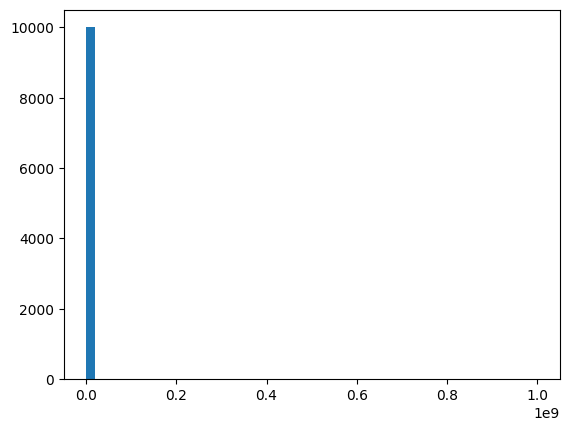

In [1]:
# Ativa a exibição de gráficos inline no Jupyter Notebook
%matplotlib inline

# Importa a biblioteca NumPy para operações numéricas
import numpy as np

# Gera um array de 10.000 rendimentos (incomes) seguindo uma distribuição normal
# com média de 27.000 e desvio padrão de 15.000
incomes = np.random.normal(27000, 15000, 10000)

# Adiciona um valor extremo (outlier) ao array de rendimentos
incomes = np.append(incomes, [1000000000])

# Importa a biblioteca Matplotlib para visualização de dados
import matplotlib.pyplot as plt

# Cria um histograma dos rendimentos, com 50 bins (divisões)
plt.hist(incomes, 50)

# Exibe o histograma gerado
plt.show()


Isso não é muito útil de se olhar. Um bilionário acabou comprimindo todos os outros em uma única linha do meu histograma. Além disso, distorceu significativamente minha renda média:

In [2]:
incomes.mean()

127369.45987798068

É importante investigar o que está causando os valores discrepantes e entender de onde eles vêm. Você também precisa pensar se removê-los é uma coisa válida a se fazer, dado o espírito do que você está tentando analisar. Se eu sei que quero entender mais sobre a renda dos “americanos típicos”, filtrar os bilionários parece ser uma coisa legítima a se fazer. Aqui está algo um pouco mais robusto do que filtrar bilionários – ele filtra qualquer coisa além de dois desvios padrão do valor mediano no conjunto de dados:

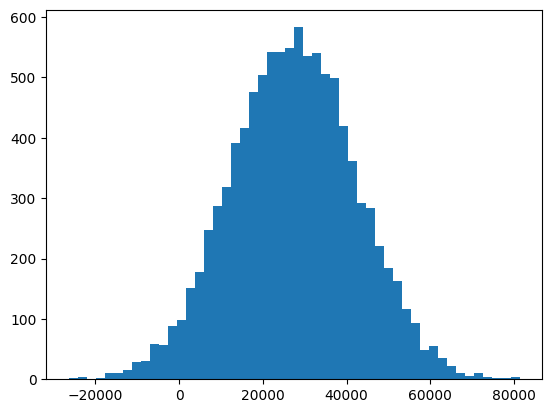

In [3]:
# Define uma função para rejeitar outliers com base na mediana e no desvio padrão
def reject_outliers(data):
    # Calcula a mediana dos dados
    u = np.median(data)
    # Calcula o desvio padrão dos dados
    s = np.std(data)
    # Filtra os dados, mantendo apenas os valores que estão dentro de 2 desvios padrão da mediana
    filtered = [e for e in data if (u - 2 * s < e < u + 2 * s)]
    return filtered  # Retorna os dados filtrados

# Aplica a função de rejeição de outliers aos rendimentos (incomes)
filtered = reject_outliers(incomes)

# Cria um histograma dos rendimentos filtrados, com 50 bins (divisões)
plt.hist(filtered, 50)

# Exibe o histograma gerado
plt.show()


Isso parece melhor. E nossa média é mais, bem, significativa agora também:

In [4]:
np.mean(filtered)

27382.196823968483

## Activity
Em vez de um único valor discrepante, adicione vários valores discrepantes gerados aleatoriamente aos dados. Experimente diferentes valores do múltiplo do desvio padrão para identificar valores discrepantes e ver que efeito isso tem nos resultados finais.

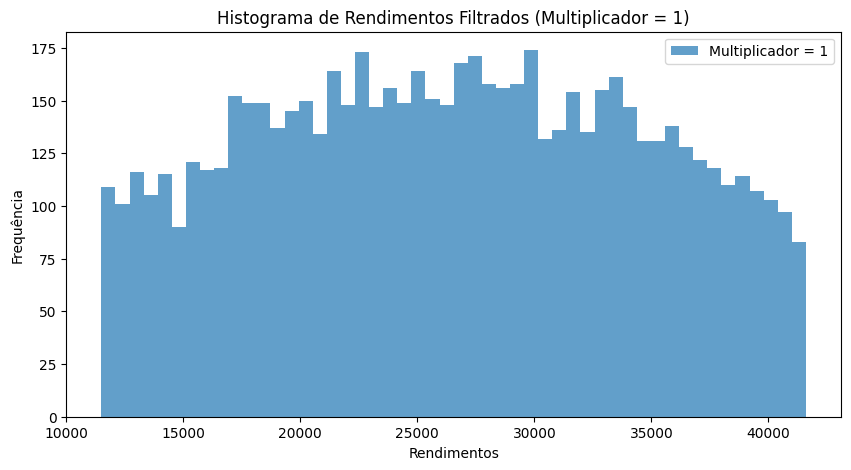

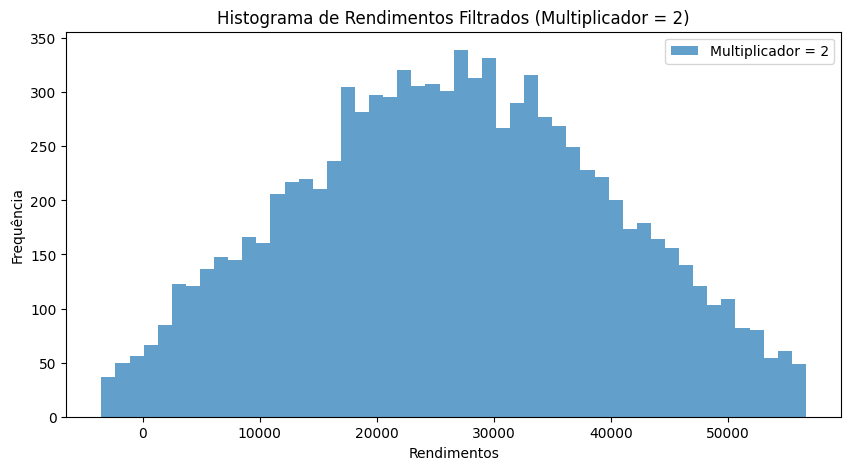

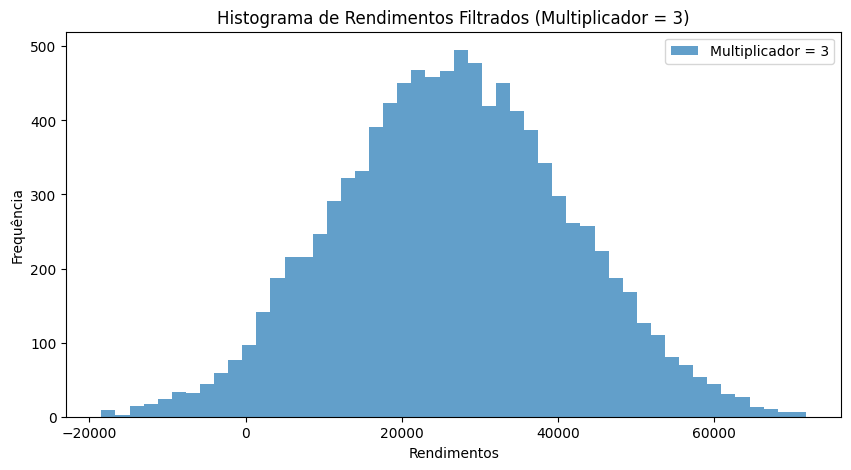

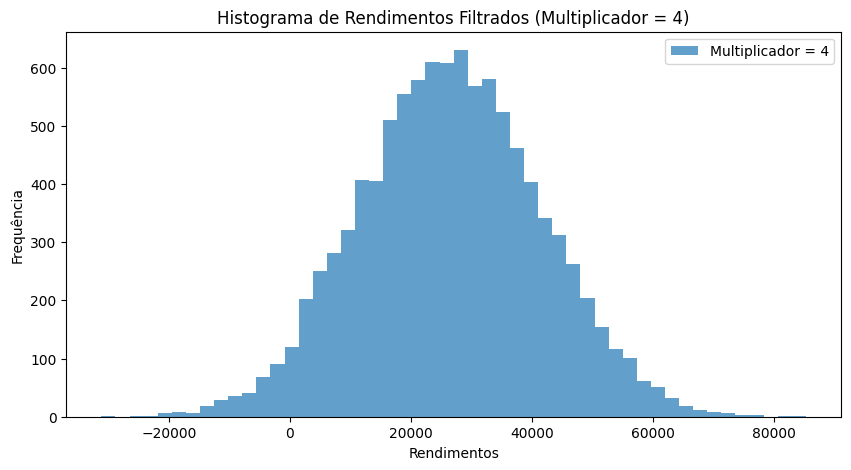

In [6]:

# Importa a biblioteca Matplotlib para visualização de dados
import matplotlib.pyplot as plt

# Gera um array de 10.000 rendimentos (incomes) seguindo uma distribuição normal
# com média de 27.000 e desvio padrão de 15.000
incomes = np.random.normal(27000, 15000, 10000)

# Define o número de outliers que desejamos adicionar
num_outliers = 10

# Gera múltiplos outliers aleatórios e os adiciona ao array de rendimentos
for _ in range(num_outliers):
    # Gera um valor outlier aleatório entre 3 e 5 desvios padrão acima da média
    outlier_value = np.random.uniform(27000 + 3 * 15000, 27000 + 5 * 15000)
    # Adiciona o outlier gerado ao array de rendimentos
    incomes = np.append(incomes, outlier_value)

# Define uma função para rejeitar outliers
def reject_outliers(data, multiplier):
    # Calcula a mediana dos dados
    u = np.median(data)
    # Calcula o desvio padrão dos dados
    s = np.std(data)
    # Filtra os dados, mantendo apenas os valores que estão dentro do intervalo
    # determinado pela mediana e pelo múltiplo do desvio padrão
    filtered = [e for e in data if (u - multiplier * s < e < u + multiplier * s)]
    return filtered  # Retorna os dados filtrados

# Define diferentes multiplicadores do desvio padrão para testar
multipliers = [1, 2, 3, 4]

# Loop para testar a rejeição de outliers com diferentes multiplicadores
for multiplier in multipliers:
    # Aplica a função de rejeição de outliers aos rendimentos (incomes)
    filtered = reject_outliers(incomes, multiplier)
    
    # Cria um histograma dos rendimentos filtrados
    plt.figure(figsize=(10, 5))  # Define o tamanho da figura
    plt.hist(filtered, bins=50, alpha=0.7, label=f'Multiplicador = {multiplier}')
    # Define o título do histograma, indicando o multiplicador utilizado
    plt.title(f'Histograma de Rendimentos Filtrados (Multiplicador = {multiplier})')
    plt.xlabel('Rendimentos')  # Rótulo do eixo X
    plt.ylabel('Frequência')    # Rótulo do eixo Y
    plt.legend()  # Adiciona uma legenda
    plt.show()   # Exibe o histograma gerado


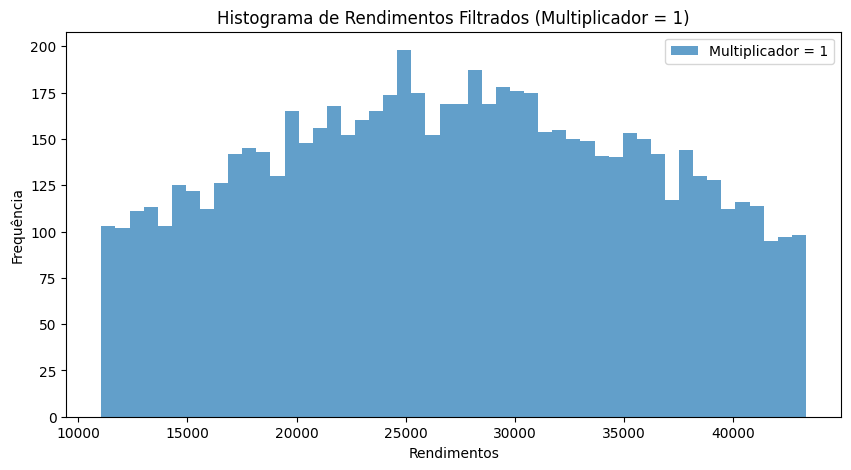

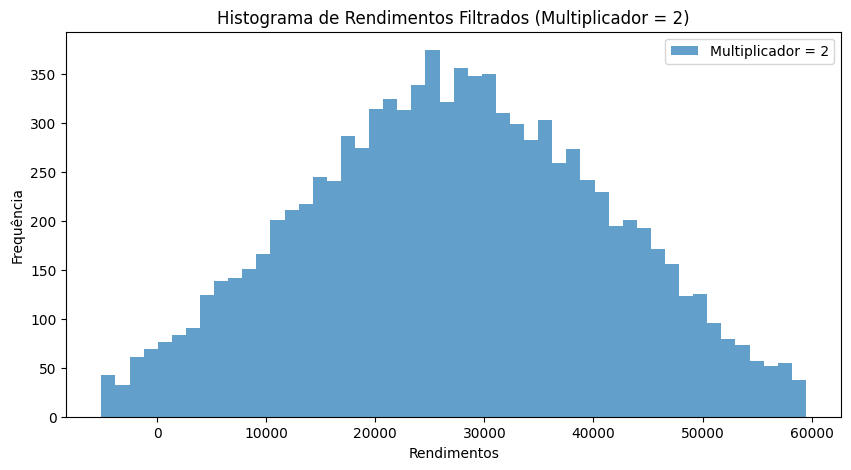

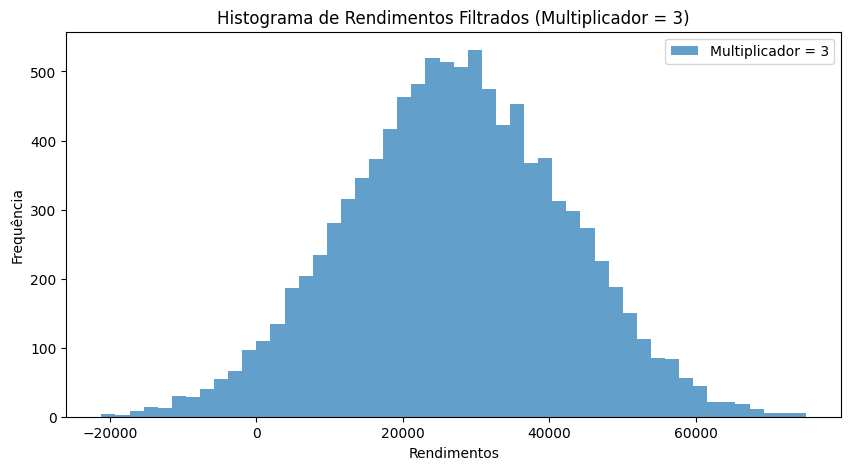

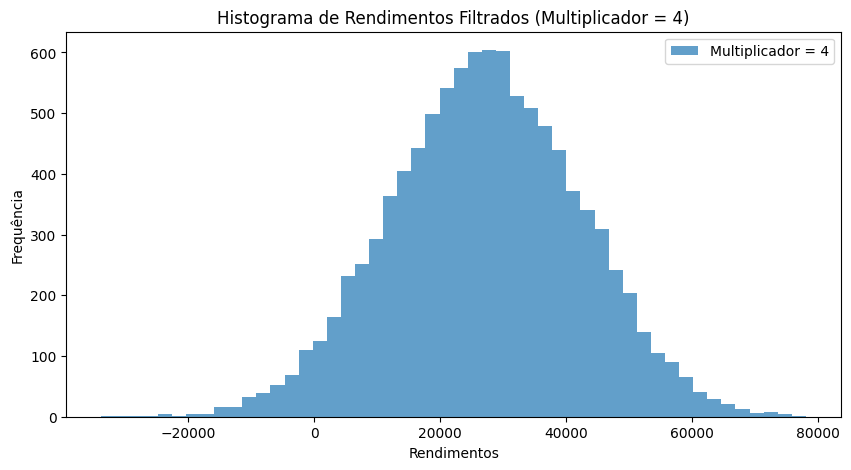

In [7]:
# Gera um array de 10.000 rendimentos (incomes) seguindo uma distribuição normal
# com média de 27.000 e desvio padrão de 15.000
incomes = np.random.normal(27000, 15000, 10000)

# Define o número de outliers que desejamos adicionar
num_low_outliers = 5   # Número de outliers muito baixos
num_high_outliers = 5  # Número de outliers muito altos

# Gera outliers baixos (valores muito abaixo da média)
for _ in range(num_low_outliers):
    outlier_value = np.random.uniform(-100000, -50000)  # Valores muito baixos
    incomes = np.append(incomes, outlier_value)

# Gera outliers altos (valores muito acima da média)
for _ in range(num_high_outliers):
    outlier_value = np.random.uniform(100000, 500000)  # Valores muito altos
    incomes = np.append(incomes, outlier_value)

# Define uma função para rejeitar outliers
def reject_outliers(data, multiplier):
    # Calcula a mediana dos dados
    u = np.median(data)
    # Calcula o desvio padrão dos dados
    s = np.std(data)
    # Filtra os dados, mantendo apenas os valores que estão dentro do intervalo
    # determinado pela mediana e pelo múltiplo do desvio padrão
    filtered = [e for e in data if (u - multiplier * s < e < u + multiplier * s)]
    return filtered  # Retorna os dados filtrados

# Define diferentes multiplicadores do desvio padrão para testar
multipliers = [1, 2, 3, 4]

# Loop para testar a rejeição de outliers com diferentes multiplicadores
for multiplier in multipliers:
    # Aplica a função de rejeição de outliers aos rendimentos (incomes)
    filtered = reject_outliers(incomes, multiplier)
    
    # Cria um histograma dos rendimentos filtrados
    plt.figure(figsize=(10, 5))  # Define o tamanho da figura
    plt.hist(filtered, bins=50, alpha=0.7, label=f'Multiplicador = {multiplier}')
    # Define o título do histograma, indicando o multiplicador utilizado
    plt.title(f'Histograma de Rendimentos Filtrados (Multiplicador = {multiplier})')
    plt.xlabel('Rendimentos')  # Rótulo do eixo X
    plt.ylabel('Frequência')    # Rótulo do eixo Y
    plt.legend()  # Adiciona uma legenda
    plt.show()   # Exibe o histograma gerado
